In [18]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [19]:
df = pd.read_csv("../data/standard_data.csv")
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
99,862548,M,14.42,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.058390,...,30.86,109.50,826.4,0.14310,0.3026,0.31940,0.15650,0.2718,0.09353,NaN
402,904689,B,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.018830,...,24.61,96.31,621.9,0.09329,0.2318,0.16040,0.06608,0.3207,0.07247,NaN
454,911202,B,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.022720,...,22.15,91.62,633.5,0.12250,0.1517,0.18870,0.09851,0.3270,0.07330,NaN
313,893988,B,11.54,10.72,73.73,409.1,0.08597,0.05969,0.01367,0.008907,...,12.87,81.23,467.8,0.10920,0.1626,0.08324,0.04715,0.3390,0.07434,NaN
476,911654,B,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.030580,...,27.26,112.10,828.5,0.11530,0.3429,0.25120,0.13390,0.2534,0.07858,NaN


In [20]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [21]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [22]:
df.drop('id',axis='columns',inplace=True)

In [23]:
df.sample(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
142,B,11.43,17.31,73.66,398.0,0.10920,0.09486,0.02031,0.01861,0.1645,...,26.76,82.66,503.0,0.14130,0.17920,0.07708,0.06402,0.2584,0.08096,NaN
443,B,10.57,18.32,66.82,340.9,0.08142,0.04462,0.01993,0.01111,0.2372,...,23.31,69.35,366.3,0.09794,0.06542,0.03986,0.02222,0.2699,0.06736,NaN


In [24]:
df.drop('Unnamed: 32',axis='columns',inplace=True)

In [25]:
df.sample(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
554,B,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.24390,0.06493,0.2372,0.07242
150,B,13.00,20.78,83.51,519.4,0.11350,0.07589,0.03136,0.02645,0.2540,...,14.16,24.11,90.82,616.7,0.1297,0.1105,0.08112,0.06296,0.3196,0.06435


In [26]:
cols_to_scale = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                 'concavity_mean','concave points_mean','symmetry_mean', 'fractal_dimension_mean','radius_se',
                 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
                 'concave points_se','symmetry_se', 'fractal_dimension_se', 'radius_worst','texture_worst',
                 'perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
                 'symmetry_worst', 'fractal_dimension_worst']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [27]:
df.sample(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
557,B,0.115576,0.614474,0.106903,0.054210,0.258193,0.093031,0.000000,0.000000,0.344444,...,0.091071,0.592217,0.080133,0.035735,0.238592,0.042970,0.000000,0.000000,0.179381,0.096091
348,B,0.212457,0.213730,0.201990,0.109947,0.344227,0.121097,0.060614,0.115408,0.289899,...,0.162931,0.233742,0.145724,0.071422,0.541042,0.082186,0.078458,0.225017,0.253499,0.213761


In [28]:
X = df.drop('diagnosis',axis='columns')
y = testLabels = df.diagnosis.astype(np.object)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
y_train.value_counts()

B    290
M    165
Name: diagnosis, dtype: int64

In [31]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [32]:
len(X_train.columns)

30

# Undersample

In [33]:
# Class count
count_class_B, count_class_M = df.diagnosis.value_counts()
print(count_class_B, count_class_M)

# Divide by class
df_class_M = df[df['diagnosis'] == 'M']
df_class_B = df[df['diagnosis'] == 'B']

357 212


In [34]:
# Undersample 0-class and concat the DataFrames of both class
df_class_B_under = df_class_B.sample(count_class_M)
df_test_under = pd.concat([df_class_B_under, df_class_M], axis=0)

print('Random under-sampling:')
print(df_test_under.diagnosis.value_counts())

Random under-sampling:
B    212
M    212
Name: diagnosis, dtype: int64


# Oversample

In [35]:
# Oversample M-class and concat the DataFrames of both classes
df_class_M_over = df_class_M.sample(count_class_B, replace=True)
df_test_over = pd.concat([df_class_M_over, df_class_B], axis=0)

print('Random over-sampling:')
print(df_test_over.diagnosis.value_counts())

Random over-sampling:
M    357
B    357
Name: diagnosis, dtype: int64


# Ensemble with undersampling

In [36]:
X = df.drop('diagnosis',axis='columns')
y = df['diagnosis']

In [37]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [49]:
df_test_over.to_csv('data_over.csv')

In [39]:
df_test_under.to_csv('data_under.csv')

In [ ]:
df_test_standard.to_csv( "../data/standard_data.csv" )

EDA

In [50]:
bc = pd.read_csv("../data/standard_data.csv")
mean=bc.iloc[:,1:11]
se=bc.iloc[:,12:22]
worst=bc.iloc[:,22:]

In [51]:
mean.sample(2)
se.sample(2)


,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
365,0.5781,0.9168,4.218,72.44,0.006208,0.019060,0.02375,0.014610,0.01445,0.001906
153,0.2251,0.7815,1.429,15.48,0.009019,0.008985,0.01196,0.008232,0.02388,0.001619


AttributeError: 'AxesSubplot' object has no attribute 'rowNum'

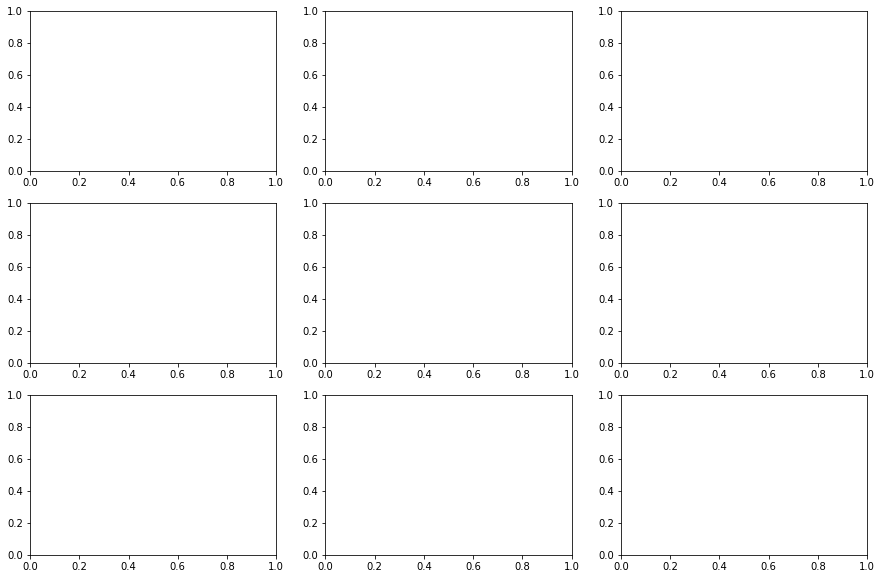

In [52]:
mean_histogram = mean.hist(bins=20, figsize=(15, 10),grid=False,)

AttributeError: 'AxesSubplot' object has no attribute 'rowNum'

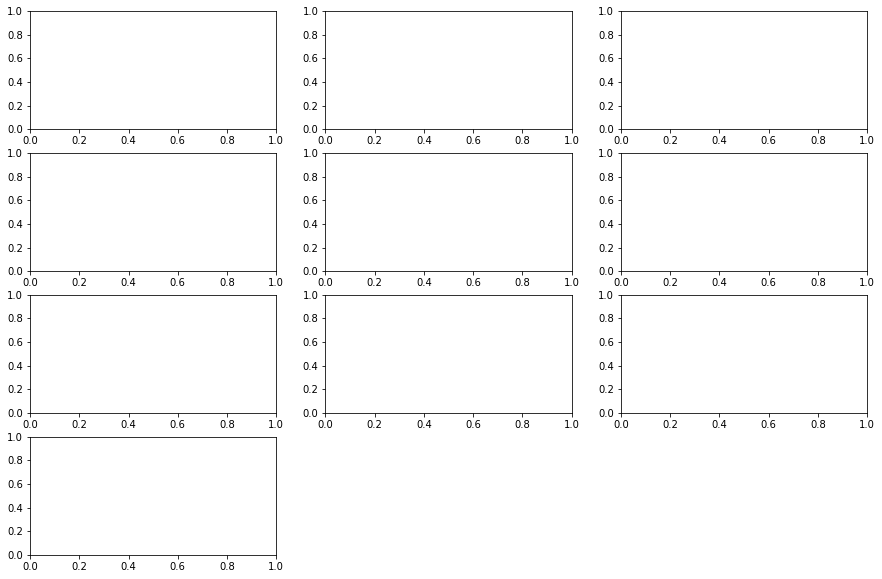

In [53]:
se_histogram = se.hist(bins=20, figsize=(15, 10),grid=False,)

AttributeError: 'AxesSubplot' object has no attribute 'rowNum'

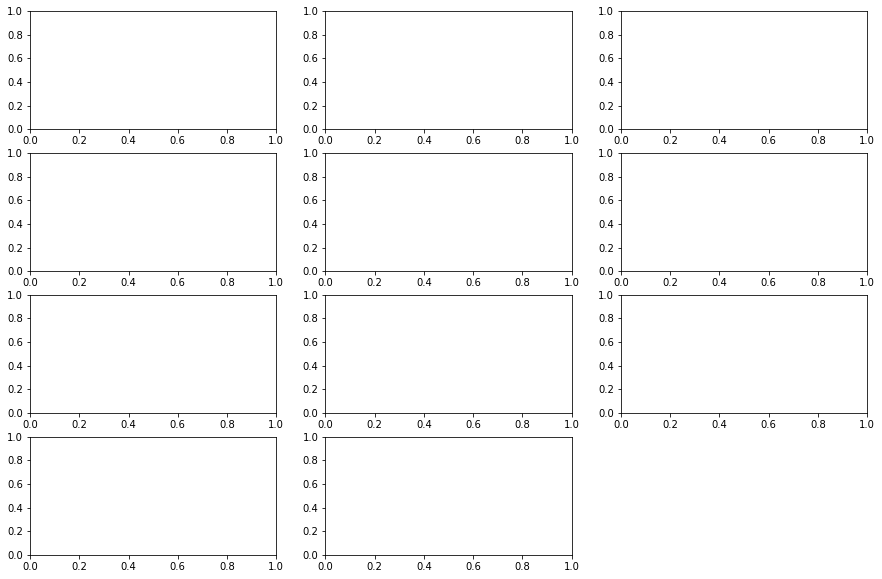

In [54]:
worst_histogram = worst.hist(bins=20, figsize=(15, 10),grid=False,)

In [55]:
cor = mean.corr()

<AxesSubplot:>

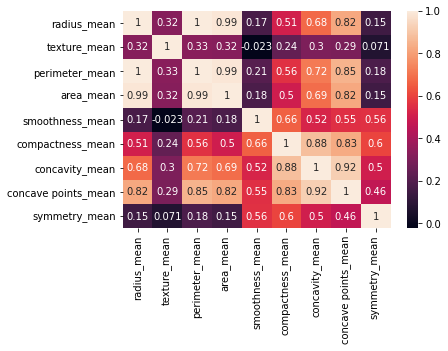

In [56]:
import seaborn as sn

sn.heatmap( cor, annot=True )

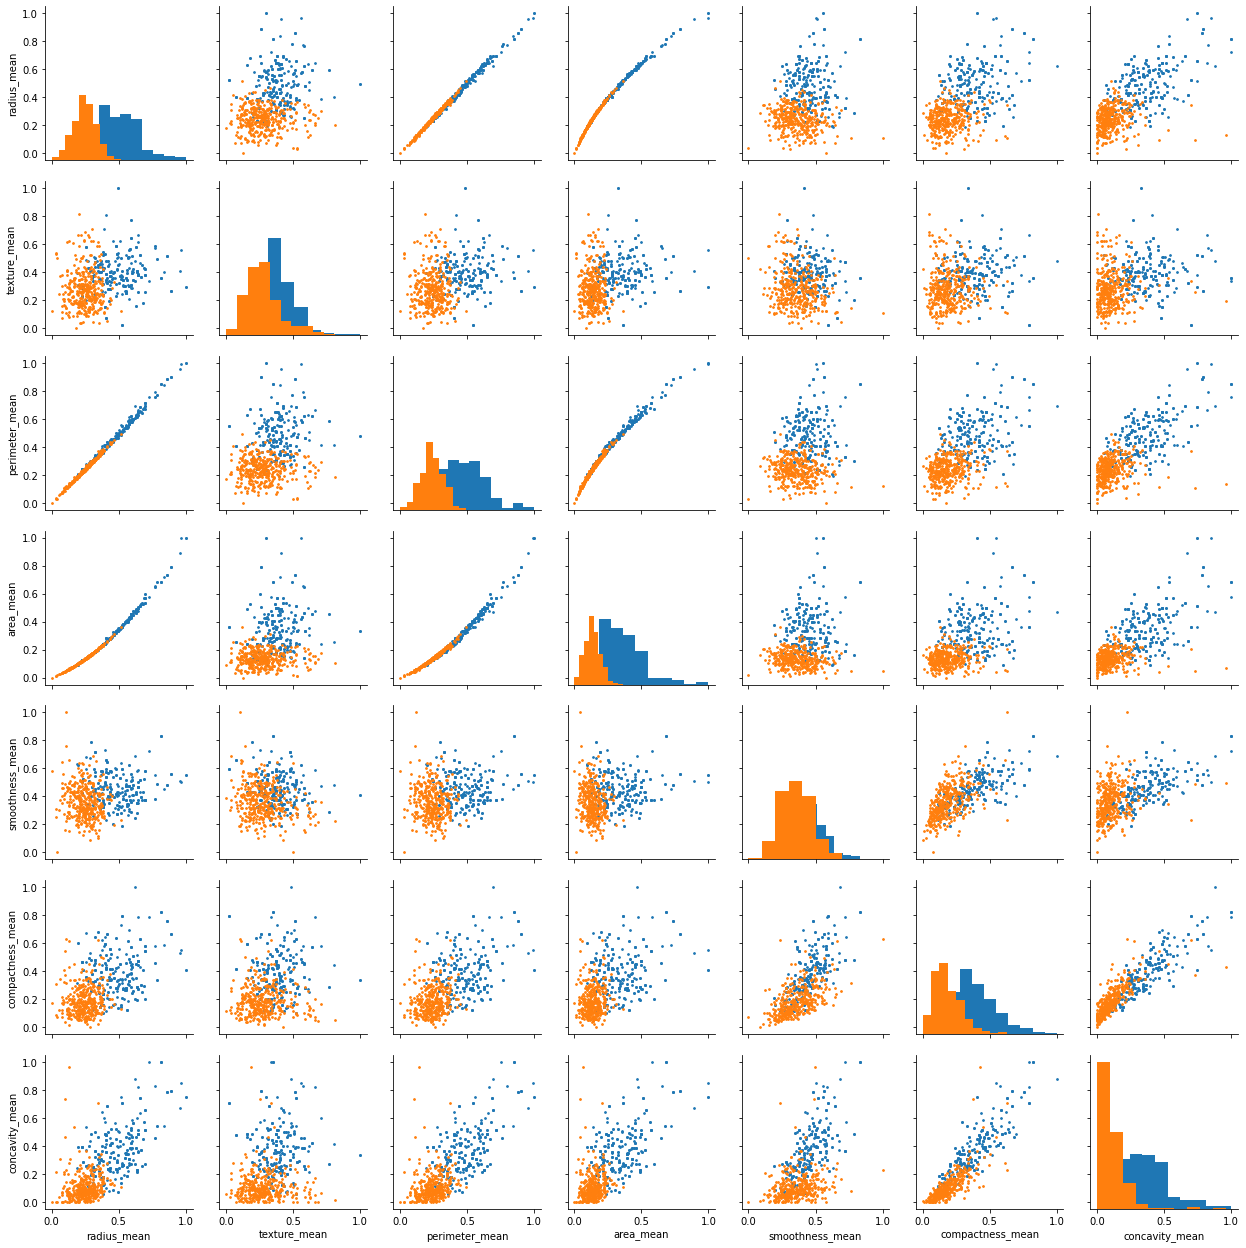

In [48]:
g = sn.PairGrid(bc[[bc.columns[1],bc.columns[2],bc.columns[3],
                     bc.columns[4], bc.columns[5],bc.columns[6],bc.columns[7],bc.columns[8]]],hue='diagnosis' )
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)